
* Nama: Dhimas Apryza Haryadi
* Nim: 23.11.5495
* Kelas: BDDM2

### **Analisis Segmentasi Pertandingan Sepak Bola Internasional Menggunakan Metode K-Means Clustering**

In [ ]:
#1.IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#2.LOAD DATASET
df = pd.read_csv('football_dataset_gabungan.csv')

print("Dataset dimuat")
print("Dimensi data:", df.shape)
df.head()

Dataset dimuat
Dimensi data: (79043, 16)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty,winner,first_shooter
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#3.DATA PREPROCESSING
# Pilih kolom numerik yang relevan
df = df[['home_team', 'away_team', 'home_score', 'away_score']]

# Hapus data kosong
df.dropna(inplace=True)

# Feature Engineering
df['goal_difference'] = abs(df['home_score'] - df['away_score'])
df['total_goals'] = df['home_score'] + df['away_score']

df.head()

,home_team,away_team,home_score,away_score,goal_difference,total_goals
0,Scotland,England,0,0,0,0
1,England,Scotland,4,2,2,6
2,Scotland,England,2,1,1,3
3,England,Scotland,2,2,0,4
4,Scotland,England,3,0,3,3


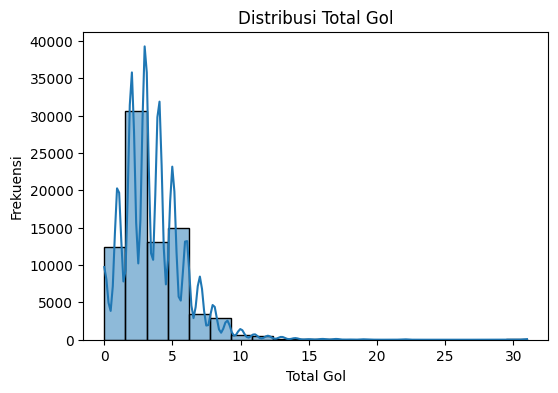

In [ ]:
#4.EDA (EXPLORATORY DATA ANALYSIS)
plt.figure(figsize=(6,4))
sns.histplot(df['total_goals'], bins=20, kde=True)
plt.title('Distribusi Total Gol')
plt.xlabel('Total Gol')
plt.ylabel('Frekuensi')
plt.show()

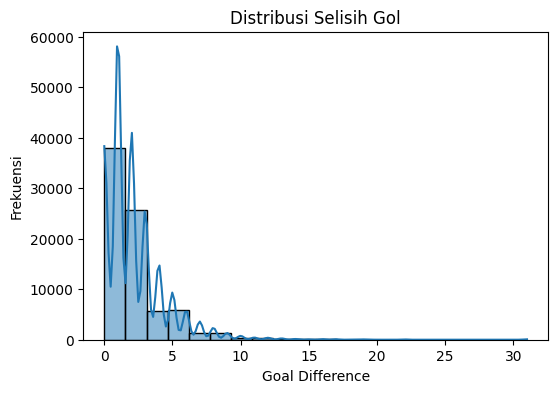

In [ ]:
# Distribusi Selisih Gol
plt.figure(figsize=(6,4))
sns.histplot(df['goal_difference'], bins=20, kde=True)
plt.title('Distribusi Selisih Gol')
plt.xlabel('Goal Difference')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
#5.NORMALISASI DATA
X = df[['goal_difference', 'total_goals']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

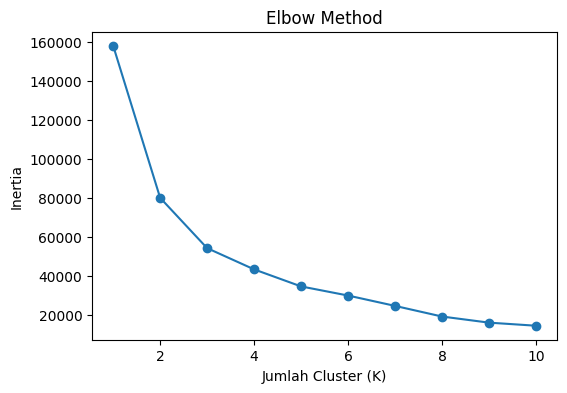

In [ ]:
#6.MENENTUKAN K OPTIMAL (ELBOW METHOD)
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#7.MODELING K-MEANS
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df.head()

,home_team,away_team,home_score,away_score,goal_difference,total_goals,cluster
0,Scotland,England,0,0,0,0,0
1,England,Scotland,4,2,2,6,2
2,Scotland,England,2,1,1,3,0
3,England,Scotland,2,2,0,4,0
4,Scotland,England,3,0,3,3,0


In [ ]:
#8.EVALUASI MODEL (SILHOUETTE SCORE)
sil_score = silhouette_score(X_scaled, df['cluster'])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.44849058862402064


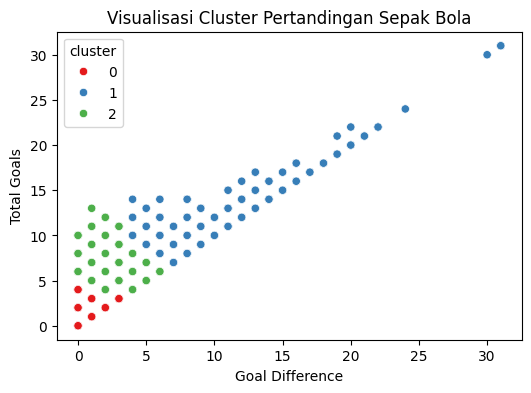

In [ ]:
#9.VISUALISASI HASIL CLUSTER
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['goal_difference'],
    y=df['total_goals'],
    hue=df['cluster'],
    palette='Set1'
)
plt.title('Visualisasi Cluster Pertandingan Sepak Bola')
plt.xlabel('Goal Difference')
plt.ylabel('Total Goals')
plt.show()